In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import nnfs
from nnfs.datasets import vertical_data, spiral_data
nnfs.init()

import model_nn

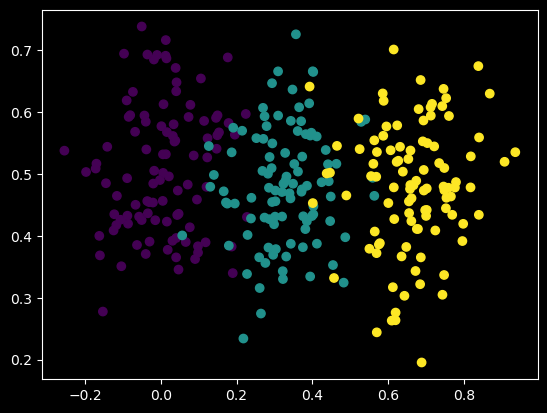

In [2]:
X, y= vertical_data(samples= 100, classes= 3)

plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

# Stupid way 1: random

In [3]:
a= np.array([[1, 2, 3], 
            [4, 5, 6], 
            [7, 8, 9]])

np.argmax(a, axis= 1)

array([2, 2, 2])

In [4]:
nnfs.init()

n_samples= 300
n_classes= 3
X, y= vertical_data(samples= int(n_samples/n_classes), classes= n_classes)

n_features= X.shape[1]

# create model
dense1= model_nn.Layer_Dense(n_features= n_features, n_neurons= 3)
activ1= model_nn.Activation_ReLU()
dense2= model_nn.Layer_Dense(n_features= 3, n_neurons= 3)
activ2= model_nn.Activation_Softmax()

# create loss function
loss_function= model_nn.Loss_CategoricalCrossentropy()

# helper var
lowest_loss= 999_999_999 # initialize loss to some large value
# create an array with the same shape as weights and biases
best_dense1_weights= dense1.weight.copy()
best_dense1_biases= dense1.bias.copy()
best_dense2_weights= dense2.weight.copy()
best_dense2_biases= dense2.bias.copy()

for iter in range(1_000):

    # generate random weight and bias
    dense1.weight= 0.05 * np.random.randn(n_features, 3)
    dense1.bias= 0.05 * np.random.randn(1, 3)
    dense2.weight= 0.05 * np.random.randn(3, 3)
    dense2.bias= 0.05 * np.random.randn(1, 3)

    # perform forward pass
    dense1.forward(X)
    activ1.forward(dense1.output)
    dense2.forward(activ1.output)
    activ2.forward(dense2.output)

    # get loss and accuracy
    loss= loss_function.calculate(y, activ2.output)
    y_pred= np.argmax(activ2.output, axis= 1)
    acc= np.mean(y == y_pred)

    # if loss is smaller than current best loss, 
    # set weight and bias to this w and b
    if loss < lowest_loss:
        best_dense1_weights= dense1.weight.copy()
        best_dense1_biases= dense1.bias.copy()
        best_dense2_weights= dense2.weight.copy()
        best_dense2_biases= dense2.bias.copy()
        lowest_loss= loss

        print(f'New set of params found.' 
              f' Iter {iter}, loss = {loss: .3f},'
              f' acc = {acc: .3f}'
              )

New set of params found. Iter 0, loss =  1.099, acc =  0.333
New set of params found. Iter 3, loss =  1.098, acc =  0.333
New set of params found. Iter 117, loss =  1.098, acc =  0.333
New set of params found. Iter 124, loss =  1.098, acc =  0.600
New set of params found. Iter 165, loss =  1.098, acc =  0.333
New set of params found. Iter 552, loss =  1.097, acc =  0.340
New set of params found. Iter 778, loss =  1.097, acc =  0.333


# Stupid way but better: start with the current best w and b, update iteratively

In [5]:
nnfs.init()

n_samples= 300
n_classes= 3
X, y= vertical_data(samples= int(n_samples/n_classes), 
                    classes= n_classes)

n_features= X.shape[1]

# create model
dense1= model_nn.Layer_Dense(n_features= n_features, n_neurons= 3)
activ1= model_nn.Activation_ReLU()
dense2= model_nn.Layer_Dense(n_features= 3, n_neurons= 3)
activ2= model_nn.Activation_Softmax()

# create loss function
loss_function= model_nn.Loss_CategoricalCrossentropy()

# helper var
lowest_loss= 999_999_999 # initialize loss to some large value
# create an array with the same shape as weights and biases
best_dense1_weights= dense1.weight.copy()
best_dense1_biases= dense1.bias.copy()
best_dense2_weights= dense2.weight.copy()
best_dense2_biases= dense2.bias.copy()

for iter in range(100):

    # update w and b with small random walue
    dense1.weight += 0.05 * np.random.randn(n_features, 3)
    dense1.bias += 0.05 * np.random.randn(1, 3)
    dense2.weight += 0.05 * np.random.randn(3, 3)
    dense2.bias += 0.05 * np.random.randn(1, 3)

    # perform forward pass
    dense1.forward(X)
    activ1.forward(dense1.output)
    dense2.forward(activ1.output)
    activ2.forward(dense2.output)

    # get loss and accuracy
    loss= loss_function.calculate(y, activ2.output)
    y_pred= np.argmax(activ2.output, axis= 1)
    acc= np.mean(y == y_pred)

    # if loss is smaller than current best loss, 
    # set best w and and best b to this w and b
    if loss < lowest_loss:
        best_dense1_weights= dense1.weight.copy()
        best_dense1_biases= dense1.bias.copy()
        best_dense2_weights= dense2.weight.copy()
        best_dense2_biases= dense2.bias.copy()
        lowest_loss= loss

        print(f'New set of params found.' 
              f' Iter {iter}, loss = {loss: .3f},'
              f' acc = {acc: .3f}'
              )
    # else, revert back to best w and b
    else: 
        dense1.weight = best_dense1_weights.copy()
        dense1.bias = best_dense1_biases.copy()
        dense2.weight = best_dense2_weights.copy()
        dense2.bias = best_dense2_biases.copy()

New set of params found. Iter 0, loss =  1.099, acc =  0.333
New set of params found. Iter 1, loss =  1.099, acc =  0.333
New set of params found. Iter 5, loss =  1.098, acc =  0.333
New set of params found. Iter 6, loss =  1.097, acc =  0.333
New set of params found. Iter 10, loss =  1.094, acc =  0.333
New set of params found. Iter 19, loss =  1.094, acc =  0.667
New set of params found. Iter 20, loss =  1.091, acc =  0.333
New set of params found. Iter 21, loss =  1.091, acc =  0.333
New set of params found. Iter 22, loss =  1.088, acc =  0.333
New set of params found. Iter 24, loss =  1.086, acc =  0.333
New set of params found. Iter 25, loss =  1.080, acc =  0.350
New set of params found. Iter 29, loss =  1.073, acc =  0.527
New set of params found. Iter 30, loss =  1.072, acc =  0.347
New set of params found. Iter 31, loss =  1.064, acc =  0.533
New set of params found. Iter 32, loss =  1.060, acc =  0.637
New set of params found. Iter 35, loss =  1.058, acc =  0.453
New set of p

We get better result. Almost can be called "solution".

In [6]:
# let's try with spiral dataset

nnfs.init()

n_samples= 300
n_classes= 3
X, y= spiral_data(samples= int(n_samples/n_classes), 
                    classes= n_classes)

n_features= X.shape[1]

# create model
dense1= model_nn.Layer_Dense(n_features= n_features, n_neurons= 3)
activ1= model_nn.Activation_ReLU()
dense2= model_nn.Layer_Dense(n_features= 3, n_neurons= 3)
activ2= model_nn.Activation_Softmax()

# create loss function
loss_function= model_nn.Loss_CategoricalCrossentropy()

# helper var
lowest_loss= 999_999_999 # initialize loss to some large value
# create an array with the same shape as weights and biases
best_dense1_weights= dense1.weight.copy()
best_dense1_biases= dense1.bias.copy()
best_dense2_weights= dense2.weight.copy()
best_dense2_biases= dense2.bias.copy()

n_iter= 10_000
for iter in range(n_iter):

    # update w and b with small random walue
    dense1.weight += 0.05 * np.random.randn(n_features, 3)
    dense1.bias += 0.05 * np.random.randn(1, 3)
    dense2.weight += 0.05 * np.random.randn(3, 3)
    dense2.bias += 0.05 * np.random.randn(1, 3)

    # perform forward pass
    dense1.forward(X)
    activ1.forward(dense1.output)
    dense2.forward(activ1.output)
    activ2.forward(dense2.output)

    # get loss and accuracy
    loss= loss_function.calculate(y, activ2.output)
    y_pred= np.argmax(activ2.output, axis= 1)
    acc= np.mean(y == y_pred)

    # if loss is smaller than current best loss, 
    # set best w and and best b to this w and b
    if loss < lowest_loss:
        best_dense1_weights= dense1.weight.copy()
        best_dense1_biases= dense1.bias.copy()
        best_dense2_weights= dense2.weight.copy()
        best_dense2_biases= dense2.bias.copy()
        lowest_loss= loss

        # only print result after 5000 iterations
        if iter > 5_000: 
            print(f'New set of params found.' 
                  f' Iter {iter}, loss = {loss: .3f},'
                  f' acc = {acc: .3f}'
                  )
    # else, revert back to best w and b
    else: 
        dense1.weight = best_dense1_weights.copy()
        dense1.bias = best_dense1_biases.copy()
        dense2.weight = best_dense2_weights.copy()
        dense2.bias = best_dense2_biases.copy()

New set of params found. Iter 5157, loss =  1.079, acc =  0.393
New set of params found. Iter 5415, loss =  1.079, acc =  0.390


With spiral data, we get stuck. After iter 5415, we cannot get any better. The most probable reason for this is called a local minimum of loss. We get stuck in a local minimum.